In [1]:
import numpy as np
import math
from math import sqrt as sqrt
import matplotlib.pyplot as plt
import pandas as pd
from  numpy.random import binomial as rbinom
from numpy.random import normal as rnorm
from numpy.random import uniform as runi
from scipy.stats import norm,binom,t

<img src="hw2-1.jpg"/>


# HW2 
## Question2 MC FOR PUT & CALL PRICE
a) Generate a sample of M = 25 values of S26. Compute the resulting Monte Carlo estimate for the value of a European Put which has strike K = 60. Provide both the point estimate based on sample average, as well as a 95% confidence interval based on the t-distribution of the sample average estimator

 $\frac{1}{M}\sum_{m=1}^M Q(w_m)V_N(w_m)(1+r)^{(-N)}$

In [2]:
s0 = 50
u=1.06
r=0.01
d = 0.98
q = (1+r-d)/(u-d)
M=25
N=26

# generate 25 values of put/call price and get mean & SD
def sim(option_type, k):
    heads = np.zeros(M)
    s_26 = np.zeros(M)
    payoff=np.zeros(M)
    v0=np.zeros(M)
    for i in range(M):
        heads[i] = rbinom(N,q)
        s_26[i] = s0*u**(heads[i])*d**(N-heads[i])
        if option_type == "call":
            payoff[i] = max((s_26[i] - k),0)
            v0[i] = payoff[i]/(1+r)**(N)
        if option_type == "put":
            payoff[i] = max((k -s_26[i]),0)
            v0[i] = payoff[i]/(1+r)**(N)

    return np.mean(v0), np.std(v0)

avg_c, sd_c = sim("call",80)
avg_p, sd_p = sim("put", 60)
interval_c = t.interval(0.95, df = 24, loc = avg_c, scale = sd_c/sqrt(M))
interval_p = t.interval(0.95,df = 24, loc= avg_p, scale = sd_p/sqrt(M))
print("Call option sample mean, sample sd, and 95% ci are, respectively:",avg_c,sd_c, interval_c)
print("Put option sample mean, sample sd, and 95% ci are, respectively",avg_p,sd_p, interval_p)


Call option sample mean, sample sd, and 95% ci are, respectively: 1.4237272985241622 3.1074498715351186 (0.14103503448566057, 2.706419562562664)
Put option sample mean, sample sd, and 95% ci are, respectively 2.1686454711793597 3.2351911221723118 (0.8332242104507246, 3.5040667319079946)


#### (b) Repeat above 10 times, compare with the true no-arbitrage price( use expectation with distribution in a)



In [3]:
avg_c = []
avg_p = []
for k in range(10):
    avg_p.append(sim("put", 60)[0])
    avg_c.append(sim("call",80)[0])
v0_bar_c = np.mean(avg_c)
v0_bar_p = np.mean(avg_p)
print("Monte Carlo mean price for call is", v0_bar_c,"\n Monte Carlo mena price for put is ", v0_bar_p)

Monte Carlo mean price for call is 0.6827531372603228 
 Monte Carlo mena price for put is  2.023687877360715


In [4]:
# compute the true answer, 26 period with 27 outcome for recomibing tree
def true_p(option_type, k):
    s_26 = np.zeros(N+1)
    true_p= np.zeros(N+1)    
    for i in range (N+1):
        s_26[i] = s0*u**(N-i)*d**i
        #compute the true price with expectation of price
        if option_type == "call" :
            true_p[i]= max((s_26[i]-k),0)*binom.pmf(N-i,N,q)/(1+r)**N
        if option_type == "put" :
            true_p[i]= max((k - s_26[i]),0)*binom.pmf(N-i,N,q)/(1+r)**N
    return sum(true_p)
print("True price call option:", true_p("call", 80),"\nTrue price put option", true_p("put" , 60))

True price call option: 0.8114443945224727 
True price put option 2.123586766322797


After repeating 10 times, we can see the Monte Carlo mean price for PUT and Call are very close to the true prices which are computed with expectation under risk -netural probability.

# Question3 look back option
S0 = 50, r = 0.01, u = 1.06, d = 0.98, K = 55 and N = 30, estimate the no-arbitrage value of this option at t = 0 using a Monte Carlo simulation with M = 100 samples. Be sure to use antithetic variables, and generate your samples in pairs.

b) a histogram of the resulting values of option payoff VN.

c) Sample mean/SD of your payoffs. 

d) Final answer with a 99% - confidence interval

In [5]:
N=30
M=50
s0=50
u=1.06
d=0.98
k=55
r=0.01
q = (1+r-d)/(u-d)
# generate the stock path with 1 pair of antithetic vatiable

def sim():
    s_30 = np.zeros(N+1)
    s_30[0] =s0
    s_30_at = np.zeros(N+1)
    s_30_at[0] = s0
    #generate the path
    uni= runi(size = N)
    uni_at = [1-uni[i] for i in range(N)]
    for i in range (0,N):
        s_30[i+1] = s_30[i]*(u/d)**(binom.ppf(uni[i],1,q))*d 
        
        s_30_at[i+1] = s_30_at[i]*(u/d)**(binom.ppf(uni_at[i],1,q))*d
    
    max_path = max(s_30)  #get maximum of the stock path
    max_path_at = max(s_30_at)
    vn = max((max_path - k),0) # obtain payoff
    vn_at = max((max_path_at - k),0)
    v0 = vn/(1+r)**N           #discount payoff to get option price
    v0_at = vn_at/(1+r)**N

    return v0,v0_at, vn,vn_at  #out put a pair of payoff and option price by antithetic sampling

In [6]:
# repeat 50 times for above to get 100 samples
v0_all = []
vn_all = []
for i in range (50):
    v0,v0_at,vn,vn_at = sim()
    v0_all.extend((v0,v0_at))    
    vn_all.extend((vn,vn_at))

print("Using Monte Carlo, the value of option is",np.mean(v0_all))


Using Monte Carlo, the value of option is 11.808055167313421


(array([30., 20., 16., 14., 13.,  4.,  0.,  2.,  0.,  1.]),
 array([ 0.        ,  6.86067539, 13.72135078, 20.58202617, 27.44270155,
        34.30337694, 41.16405233, 48.02472772, 54.88540311, 61.7460785 ,
        68.60675388]),
 <a list of 10 Patch objects>)

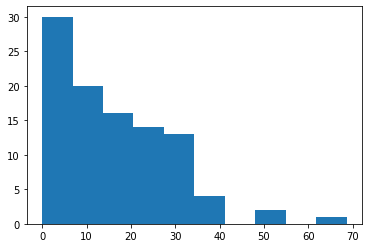

In [7]:
plt.hist(vn_all,10)

In [8]:
# (c) sample mean and sd of payoffs
print("payoff sample mean:", np.mean(vn_all), "\n payoff SD:", np.std(vn_all))
# (d) option price interval
print("Option payoff 99% confidence interval",norm.interval(0.99, loc= np.mean(vn_all), scale = np.std(vn_all)/sqrt(2*M)))

payoff sample mean: 15.91547434945451 
 payoff SD: 13.03439808964595
Option payoff 99% confidence interval (12.558035894111324, 19.272912804797695)


## Question4 
(a) M=25 MC values for S_T, estimate the value of european call and 95% CI, compare to true BS price

$c_0 = s_0N(d_1) - ke^{-rT}N(d_2)$

In [9]:
s0=50
sigma=0.2
k=45
T=1/2
r=0.04
M=25
#true B-S Price for call option 
d1 = (math.log(s0/k)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
N_d1 = norm.cdf(d1)
d2 = d1-sigma*sqrt(T)
N_d2 = norm.cdf(d2)
c0 = s0*N_d1 -k*math.exp(-r*T)*N_d2
print(c0)

6.573775055279903


In [10]:
## mc for st with bs pricing
st = np.zeros(M)
c0 = np.zeros(M)
for i in range(M):
    st[i] = s0*math.exp((r-sigma**2/2)*T+sigma*sqrt(T)*rnorm())
    c0[i] =math.exp(-r*T)*max((st[i]-k),0) 
st_mc = np.mean(st)
c0_mc = np.mean(c0)
sd_mc =np.std(c0)
interval = t.interval(0.95, df=M-1,loc= c0_mc, scale = sd_mc/sqrt(M))
print("Monte Carolo European Call value is", c0_mc, "\n95% Interval is",interval)


Monte Carolo European Call value is 6.529870981817558 
95% Interval is (4.270685548841438, 8.789056414793677)


### b. Quasi-MC,

In [11]:
u= np.linspace(0.02,0.98,25)
z=[norm.ppf(u[i]) for i in range(25)]
st = [s0*math.exp((r-sigma**2/2)*T+sigma*sqrt(T)*z[i]) for i in range(25)]
c0 = [max((st[i]-k),0)/(math.exp(-r*T))for i in range(25)]
c0_avg = np.mean(c0)
print("Quasi-MC call price",c0_avg)

Quasi-MC call price 6.792827353356196


The true BS price for the call is about 6.57.
Using regular MC with 25 samples, we can get a large 95% confidence interval, but the Quasi MC price is very closed to the true price. 

## Question5 Basket options
Submit your code, histogram of the contract payoffs, estimated contract value today, and respective 98% CI.

basket optiopn value today is 2.6118783732724906 
 payoff of the contract is 2.7184711517820963
98% CI for payoff is (2.3028702752983916, 3.134072028265801)


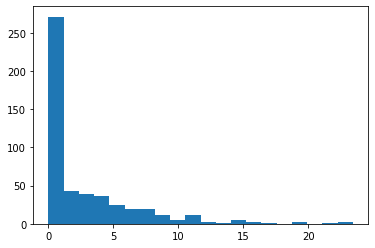

In [12]:
T=1
R=0.03
s0_list = [10*i for i in range(1,6)]
sigma_list=[0.1+0.05*i for i in range(1,6)]
st = np.zeros(5)

#simulation of basket option payoff and value
def basket_option():
    for i in range(5):
        st[i] = s0_list[i]*math.exp((r-sigma_list[i]**2/2)*T+sigma_list[i]*sqrt(T)*rnorm())
    payoff= max(sum(st)/5 -30,0)
    v0=payoff/(math.exp(-r*T))
    return payoff, v0

# repeat 500 times to get payoff and option value
v0_list=[]
payoff=[]
for i in range(500):
    v0, payoff_i  = basket_option()
    v0_list.append(v0)
    payoff.append(payoff_i)
print("basket optiopn value today is",np.mean(v0_list),"\n payoff of the contract is", np.mean(payoff))

plt.hist(payoff,bins=20)
print("98% CI for payoff is", norm.interval(0.98, loc = np.mean(payoff), scale = np.std(payoff)/sqrt(500) ))